In [ ]:
## United States ISO region energy market open source data gathered. After pre-processing works the final data was obtained for analysis. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_iso=pd.read_csv("iso_smd_hourly_2019_2023_united_byzone.csv")
df=data_iso.copy()
df.head(2)

,Date,Hr_End,Zone_Name,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,1/1/2019,1,ct,2667.3,2713.62,25.64,25.57,0.02,0.05,35.43,35.42,0.04,-0.03,38,38
1,1/1/2019,2,ct,2487.2,2578.34,20.56,20.44,0.01,0.11,38.57,38.38,0.00,0.19,38,38


In [ ]:
#Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350592 entries, 0 to 350591
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       350592 non-null  object 
 1   Hr_End     350592 non-null  int64  
 2   Zone_Name  350592 non-null  object 
 3   DA_Demand  350592 non-null  float64
 4   RT_Demand  350592 non-null  float64
 5   DA_LMP     350592 non-null  float64
 6   DA_EC      350592 non-null  float64
 7   DA_CC      350592 non-null  float64
 8   DA_MLC     350592 non-null  float64
 9   RT_LMP     350592 non-null  float64
 10  RT_EC      350592 non-null  float64
 11  RT_CC      350592 non-null  float64
 12  RT_MLC     350592 non-null  float64
 13  Dry_Bulb   350592 non-null  int64  
 14  Dew_Point  350592 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 40.1+ MB


In [4]:
df.isnull().values.any()

False

In [5]:
df["Zone_Name"].value_counts()

ct      43824
me      43824
nema    43824
nh      43824
ri      43824
sema    43824
vt      43824
wcma    43824
Name: Zone_Name, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hr_End,350592.0,12.500000,6.922196,1.00,6.75,12.50,18.2500,24.00
DA_Demand,350592.0,1612.509122,931.151704,-95.30,903.80,1370.30,2186.2250,6582.20
RT_Demand,350592.0,1650.837524,900.456236,112.48,993.22,1435.37,2158.3925,6504.65
DA_LMP,350592.0,44.391417,35.918699,6.26,22.47,32.29,53.4200,376.91
DA_EC,350592.0,44.434994,35.905870,6.33,22.51,32.33,53.5200,373.15
DA_CC,350592.0,-0.012955,1.151742,-59.25,0.00,0.00,0.0100,114.45
DA_MLC,350592.0,-0.030622,0.768278,-14.53,-0.29,0.06,0.3000,9.13
RT_LMP,350592.0,43.704006,42.579094,-151.82,20.45,31.04,51.8300,2274.99
RT_EC,350592.0,43.733683,42.578826,-151.17,20.48,31.05,51.8900,2239.32
RT_CC,350592.0,-0.012942,0.760505,-89.66,0.00,0.00,0.0000,58.37


In [7]:
df.corr()

,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
Hr_End,1.000000,0.134714,0.159440,0.112997,0.113460,-0.003495,-0.014506,0.090902,0.091249,-0.002560,-0.015193,0.135084,0.009946
DA_Demand,0.134714,1.000000,0.983231,0.146851,0.147107,0.003999,-0.015529,0.122184,0.120628,0.045490,0.037603,0.130466,0.075397
RT_Demand,0.159440,0.983231,1.000000,0.155462,0.156180,0.000443,-0.031648,0.138406,0.137220,0.030370,0.032551,0.132716,0.072292
DA_LMP,0.112997,0.146851,0.155462,1.000000,0.999146,0.027823,0.014890,0.837538,0.837288,-0.006794,0.019028,-0.216578,-0.230884
DA_EC,0.113460,0.147107,0.156180,0.999146,1.000000,-0.007697,-0.011679,0.837596,0.837890,-0.012924,-0.002961,-0.217129,-0.231595
DA_CC,-0.003495,0.003999,0.000443,0.027823,-0.007697,1.000000,0.161405,-0.001099,-0.005354,0.082972,0.140030,0.003402,0.003452
DA_MLC,-0.014506,-0.015529,-0.031648,0.014890,-0.011679,0.161405,1.000000,0.012937,-0.006157,0.161992,0.818066,0.017055,0.024202
RT_LMP,0.090902,0.122184,0.138406,0.837538,0.837596,-0.001099,0.012937,1.000000,0.999581,0.006411,0.015700,-0.190663,-0.190039
RT_EC,0.091249,0.120628,0.137220,0.837288,0.837890,-0.005354,-0.006157,0.999581,1.000000,-0.015008,-0.007311,-0.190675,-0.190209
RT_CC,-0.002560,0.045490,0.030370,-0.006794,-0.012924,0.082972,0.161992,0.006411,-0.015008,1.000000,0.179659,0.010354,0.008807


In [ ]:
#Delete irrelevant columns

In [8]:
df0=df.copy()
df0.head(2)

,Date,Hr_End,Zone_Name,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,1/1/2019,1,ct,2667.3,2713.62,25.64,25.57,0.02,0.05,35.43,35.42,0.04,-0.03,38,38
1,1/1/2019,2,ct,2487.2,2578.34,20.56,20.44,0.01,0.11,38.57,38.38,0.00,0.19,38,38


In [9]:
df0=df0.drop(columns=["DA_Demand","RT_Demand","DA_CC","DA_MLC","DA_EC","RT_CC","RT_MLC","Dew_Point"])

In [11]:
df0.head(2)

,Date,Hr_End,Zone_Name,DA_LMP,RT_LMP,RT_EC,Dry_Bulb
0,1/1/2019,1,ct,25.64,35.43,35.42,38
1,1/1/2019,2,ct,20.56,38.57,38.38,38


In [ ]:
##Getting Dates by datetime

In [12]:
df1=df0.copy()
df1.head(2)

,Date,Hr_End,Zone_Name,DA_LMP,RT_LMP,RT_EC,Dry_Bulb
0,1/1/2019,1,ct,25.64,35.43,35.42,38
1,1/1/2019,2,ct,20.56,38.57,38.38,38


In [13]:
from datetime import datetime

In [14]:
df1["Date_New"]=pd.to_datetime(df1["Date"])

In [15]:
df1.head(2)

,Date,Hr_End,Zone_Name,DA_LMP,RT_LMP,RT_EC,Dry_Bulb,Date_New
0,1/1/2019,1,ct,25.64,35.43,35.42,38,2019-01-01
1,1/1/2019,2,ct,20.56,38.57,38.38,38,2019-01-01


In [16]:
df1["year"], df1["month"], df1["day"], df1["week"] = df1['Date_New'].dt.year, df1['Date_New'].dt.month, df1['Date_New'].dt.day_name(), df1['Date_New'].dt.isocalendar().week

In [17]:
df1.head(2)

,Date,Hr_End,Zone_Name,DA_LMP,RT_LMP,RT_EC,Dry_Bulb,Date_New,year,month,day,week
0,1/1/2019,1,ct,25.64,35.43,35.42,38,2019-01-01,2019,1,Tuesday,1
1,1/1/2019,2,ct,20.56,38.57,38.38,38,2019-01-01,2019,1,Tuesday,1


In [ ]:
#Data Visualization

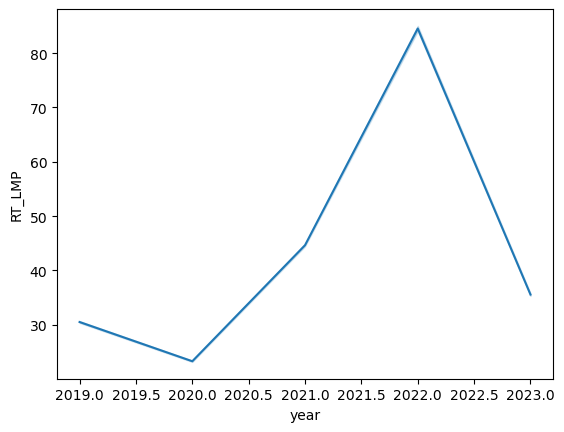

In [53]:
sns.lineplot(x="year",y="RT_LMP",data=df1);

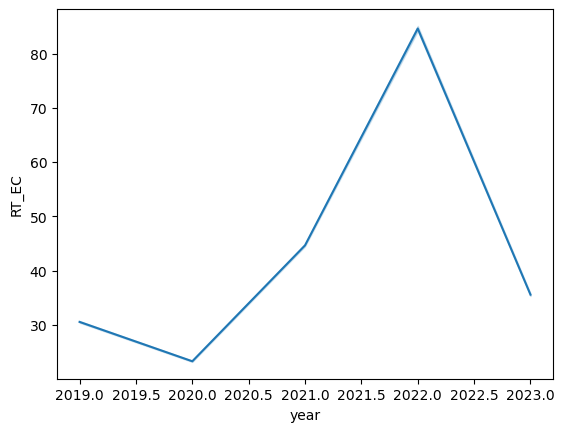

In [59]:
sns.lineplot(x="year",y="RT_EC",data=df1);

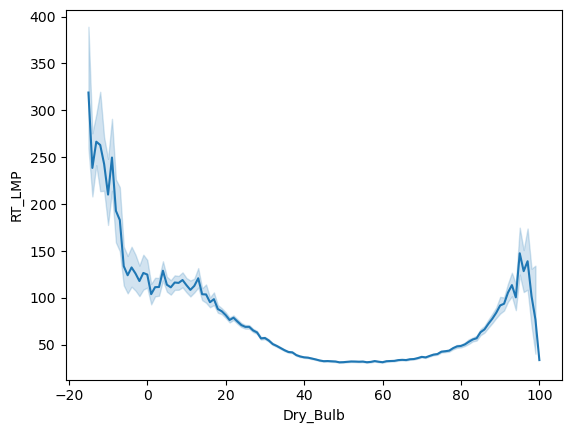

In [54]:
sns.lineplot(x="Dry_Bulb",y="RT_LMP",data=df1);

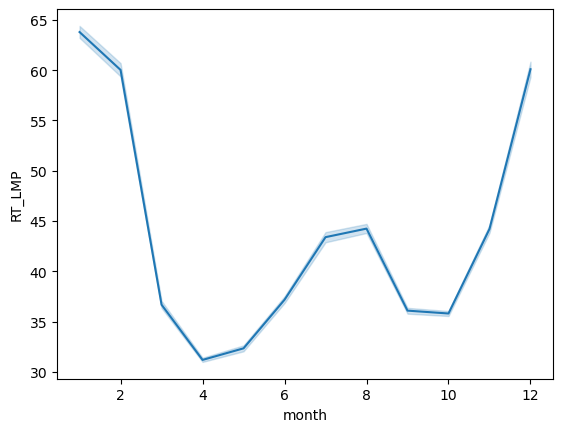

In [55]:
sns.lineplot(x="month",y="RT_LMP",data=df1);

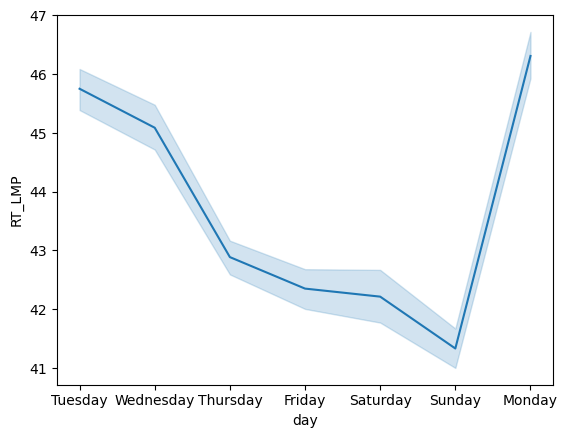

In [56]:
sns.lineplot(x="day",y="RT_LMP",data=df1);

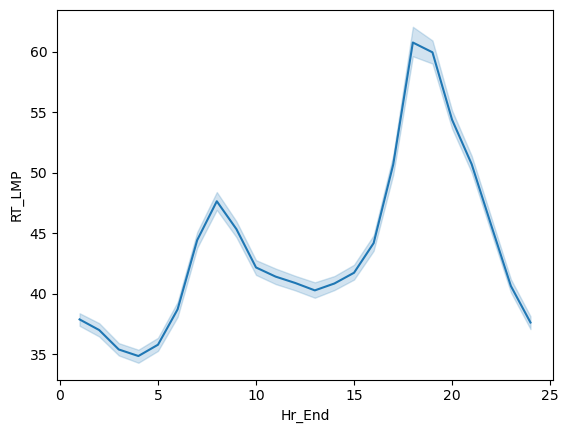

In [57]:
sns.lineplot(x="Hr_End",y="RT_LMP",data=df1);

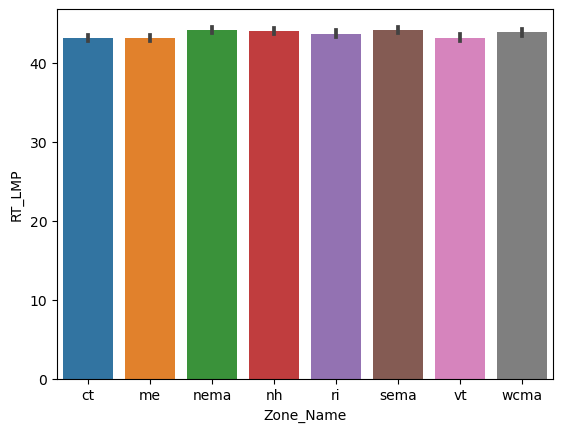

In [58]:
sns.barplot(x="Zone_Name",y="RT_LMP",data=df1);

In [18]:
df1=df1.drop(columns=["Date","Zone_Name","DA_LMP","RT_EC","Date_New","year"])

In [20]:
df1.head(2)

,Hr_End,RT_LMP,Dry_Bulb,month,day,week
0,1,35.43,38,1,Tuesday,1
1,2,38.57,38,1,Tuesday,1


In [21]:
df1.rename(columns=str.lower, inplace=True)
df1.head(2)

,hr_end,rt_lmp,dry_bulb,month,day,week
0,1,35.43,38,1,Tuesday,1
1,2,38.57,38,1,Tuesday,1


<Axes: xlabel='rt_lmp'>

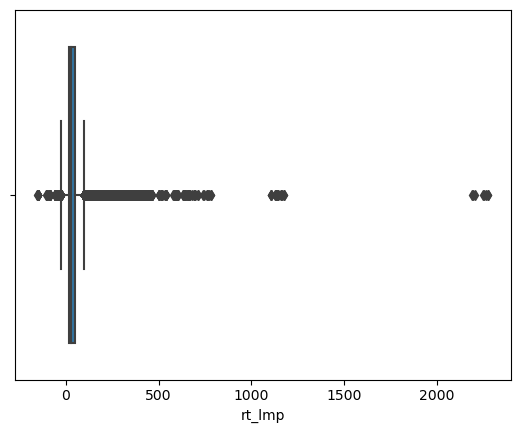

In [88]:
sns.boxplot(x="rt_lmp",data=df1)

In [21]:
df1[df1['rt_lmp'].between(-200, 0)]

,hr_end,rt_lmp,dry_bulb,month,day,week
7,8,-44.41,44,1,Tuesday,1
8,9,-19.73,47,1,Tuesday,1
578,3,-2.65,33,1,Friday,4
581,6,-1.36,30,1,Friday,4
612,13,-1.09,30,1,Saturday,4
...,...,...,...,...,...,...
349692,13,-26.60,44,11,Friday,47
350122,11,-23.18,36,12,Tuesday,50
350135,24,-3.57,34,12,Tuesday,50
350146,11,-1.90,37,12,Wednesday,50


In [22]:
df1[df1['rt_lmp'].between(250, 2300)]

,hr_end,rt_lmp,dry_bulb,month,day,week
8479,8,260.80,14,12,Friday,51
22049,18,282.40,90,7,Wednesday,27
22889,18,285.28,92,8,Wednesday,32
23201,18,273.75,88,8,Tuesday,34
23202,19,291.34,87,8,Tuesday,34
...,...,...,...,...,...,...
348930,19,292.53,54,10,Monday,43
349817,18,278.19,28,11,Wednesday,48
349830,7,280.98,27,11,Thursday,48
349831,8,269.53,27,11,Thursday,48


In [22]:
df2=df1.copy()
df2.head(2)

,hr_end,rt_lmp,dry_bulb,month,day,week
0,1,35.43,38,1,Tuesday,1
1,2,38.57,38,1,Tuesday,1


In [ ]:
#Outliers 

In [23]:
mean= df2['rt_lmp'].mean()
print(mean)

43.70400573886536


In [24]:
rt_lmp = df2['rt_lmp'].apply(lambda x:mean if x<=0 else x)

In [25]:
df2['rt_lmp_new'] = rt_lmp

In [26]:
df2.head(10)

,hr_end,rt_lmp,dry_bulb,month,day,week,rt_lmp_new
0,1,35.43,38,1,Tuesday,1,35.430000
1,2,38.57,38,1,Tuesday,1,38.570000
2,3,21.23,38,1,Tuesday,1,21.230000
3,4,18.46,37,1,Tuesday,1,18.460000
4,5,7.53,38,1,Tuesday,1,7.530000
5,6,17.89,38,1,Tuesday,1,17.890000
6,7,10.77,39,1,Tuesday,1,10.770000
7,8,-44.41,44,1,Tuesday,1,43.704006
8,9,-19.73,47,1,Tuesday,1,43.704006
9,10,19.38,49,1,Tuesday,1,19.380000


In [27]:
rt_lmp1 = df2['rt_lmp_new'].apply(lambda x:mean if x>350 else x)

In [28]:
df2['rt_lmp_new'] = rt_lmp1

In [29]:
df2.head(2)

,hr_end,rt_lmp,dry_bulb,month,day,week,rt_lmp_new
0,1,35.43,38,1,Tuesday,1,35.43
1,2,38.57,38,1,Tuesday,1,38.57


<Axes: xlabel='rt_lmp_new'>

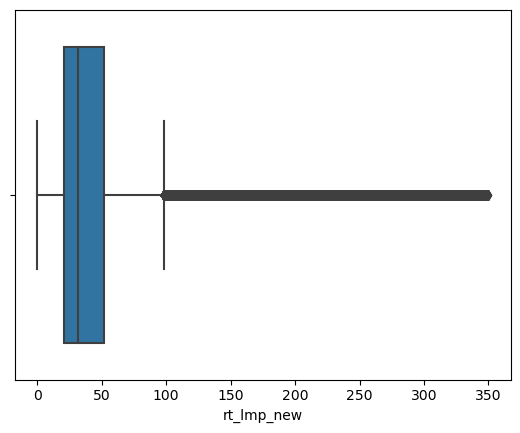

In [36]:
sns.boxplot(x="rt_lmp_new",data=df2)

In [30]:
df2=df2.drop(columns=["rt_lmp","week"])

In [31]:
df2.head(2)

,hr_end,dry_bulb,month,day,rt_lmp_new
0,1,38,1,Tuesday,35.43
1,2,38,1,Tuesday,38.57


In [ ]:
##Variable (one-hot) Transformation

In [32]:
dms=pd.get_dummies(df2,columns=["hr_end","month","day"],prefix=["hr_end","month","day"],drop_first
=True)
dms.head(2)

,dry_bulb,rt_lmp_new,hr_end_2,hr_end_3,hr_end_4,hr_end_5,hr_end_6,hr_end_7,hr_end_8,hr_end_9,...,month_9,month_10,month_11,month_12,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,38,35.43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,38.57,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
y=df2["rt_lmp_new"]

In [34]:
y.head(2)

0    35.43
1    38.57
Name: rt_lmp_new, dtype: float64

In [35]:
X=dms

In [36]:
X.head(2)

,dry_bulb,rt_lmp_new,hr_end_2,hr_end_3,hr_end_4,hr_end_5,hr_end_6,hr_end_7,hr_end_8,hr_end_9,...,month_9,month_10,month_11,month_12,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,38,35.43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,38.57,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Split test, train sets

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

In [129]:
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [117]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)
training=df2.copy()
print("training",df2.shape)

X_train (280473, 42)
X_test (70119, 42)
y_train (280473,)
y_test (70119,)
training (350592, 5)


In [ ]:
##Light GBM 

In [ ]:
#Model 

In [119]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 262.6 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.3 MB 297.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.3 MB 403.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.3 MB 532.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.3 MB 621.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 656.0 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1

In [120]:
from lightgbm import LGBMRegressor

In [121]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\cigdem\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    lightgbm-4.1.0             |   py39h5da7b33_0         1.1 MB
    openssl-3.0.13             |       h2bbff1b_0         7.4 MB
    ------------------------------------------------------------
                                           Total:         8.8 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-4.1.0-py39h5da7b33_0 None

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.08.22~ --> conda-forge::ca-certificates-2024.2.2-h56e8100_0 None
  ce



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [122]:
from lightgbm import LGBMRegressor

In [123]:
lgbm=LGBMRegressor()

In [124]:
lgbm_model=lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 280473, number of used features: 42
[LightGBM] [Info] Start training from score 43.407112


In [ ]:
#Prediction

In [127]:
y_pred=lgbm_model.predict(X_test)

In [131]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.409894487441342

In [ ]:
#mean_squared_error=1.409894487441342 bulundu

In [ ]:
#Model Tuning

In [132]:
lgbm_model

LGBMRegressor()

In [133]:
lgbm_grid={
    'colsample_bytree':[0.4,0.5,0.6,0.9,1],
    'learning_rate':[0.01,0.1,0.5,1],
    'n_estimators':[100,200,500],
    'max_depth':[2,3,4,5,6]
}

In [134]:
lgbm=LGBMRegressor()

In [135]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_grid,cv=5,n_jobs=-1,verbose=2)

In [136]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 280473, number of used features: 42
[LightGBM] [Info] Start training from score 43.407112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [137]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 6,
 'n_estimators': 500}

In [ ]:
#Final Model

In [141]:
lgbm_tuned=LGBMRegressor(colsample_bytree= 1,
                        learning_rate= 0.5,
                        max_depth= 6,
                        n_estimators= 500)
                        

In [142]:
lgbm_tuned=lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 280473, number of used features: 42
[LightGBM] [Info] Start training from score 43.407112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [143]:
y_pred=lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [144]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.1640957554340696

In [ ]:
#tuned model mean_squared_error=1.1640957554340696 bulundu

In [159]:
#Save The LightGBM Final Model

In [162]:
import joblib

In [163]:
# saving our model
joblib.dump(lgbm_tuned , 'model_jlib')

['model_jlib']

In [ ]:
# opening the file- model_jlib
# m_jlib = joblib.load('model_jlib')

In [ ]:
# call prediction
# m_jlib.predict([[values]])